# Loan Eligibility Predicition 

In [2]:
## Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Read the dataset
df = pd.read_csv('loan_predicition_dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

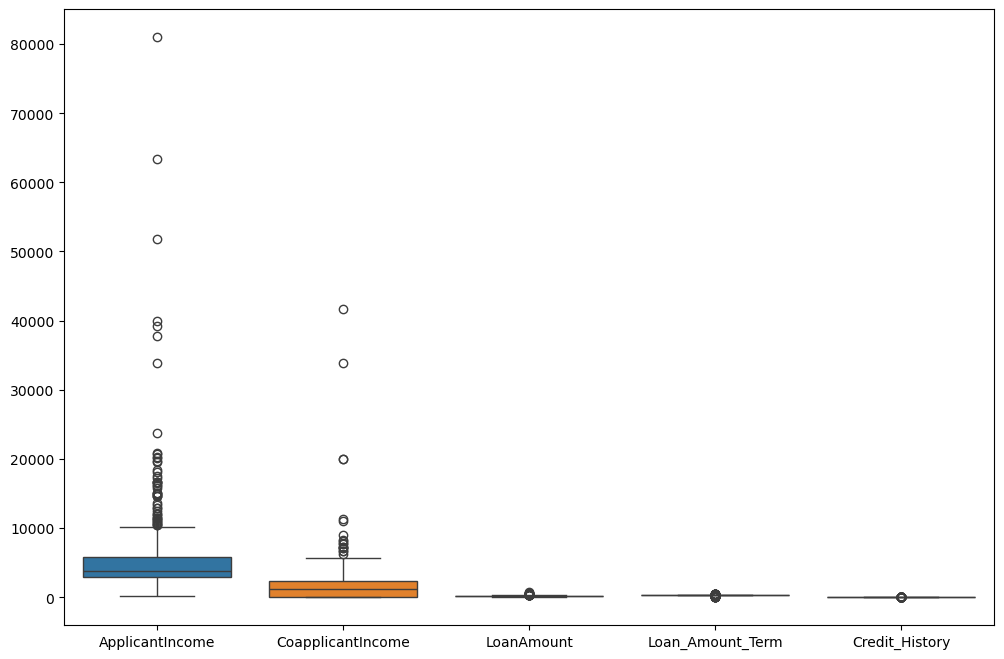

In [8]:
## Check for any outliers
plt.figure(figsize =(12,8))
sns.boxplot(data = df)

In [9]:
## Fill the null values of numerical datatype
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())


In [10]:
## Fill the null values of Object datatype
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Number of people who took loan by Gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

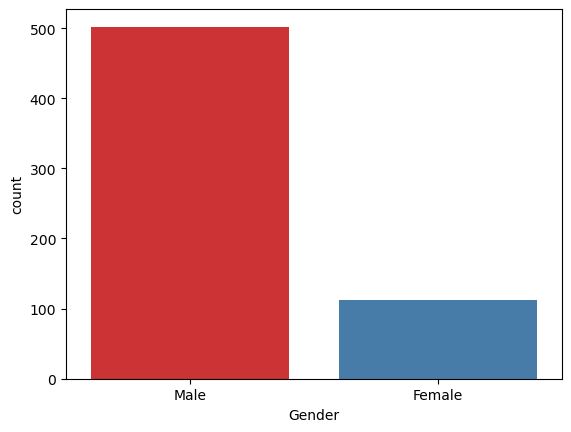

In [12]:
## EDA
## Number of people who took loan by gender
print('Number of people who took loan by Gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data = df,palette='Set1')

Number of people who took loan by Martial status
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

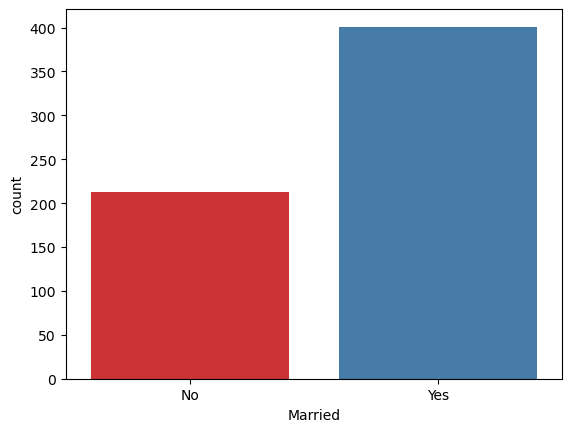

In [13]:
## Number of people who took loan by Martial status
print('Number of people who took loan by Martial status')
print(df['Married'].value_counts())
sns.countplot(x='Married',data = df,palette='Set1')

Number of people who took loan by Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

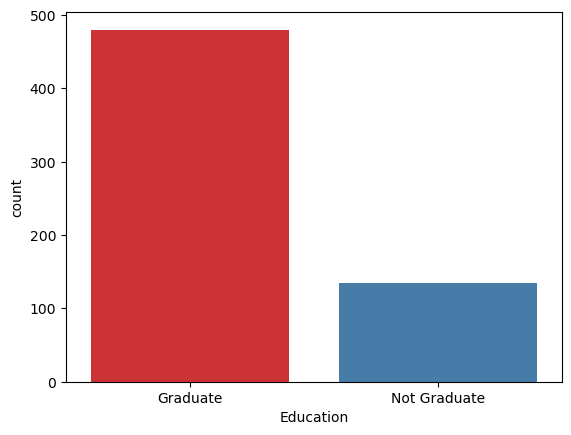

In [14]:
## Number of people who took loan by Education
print('Number of people who took loan by Education')
print(df['Education'].value_counts())
sns.countplot(x='Education',data = df,palette='Set1')

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.565181   
CoapplicantIncome        -0.116605           1.000000    0.189218   
LoanAmount                0.565181           0.189218    1.000000   
Loan_Amount_Term         -0.045242          -0.059675    0.039235   
Credit_History           -0.014477          -0.001665   -0.007031   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045242       -0.014477  
CoapplicantIncome         -0.059675       -0.001665  
LoanAmount                 0.039235       -0.007031  
Loan_Amount_Term           1.000000        0.001395  
Credit_History             0.001395        1.000000  


<Axes: >

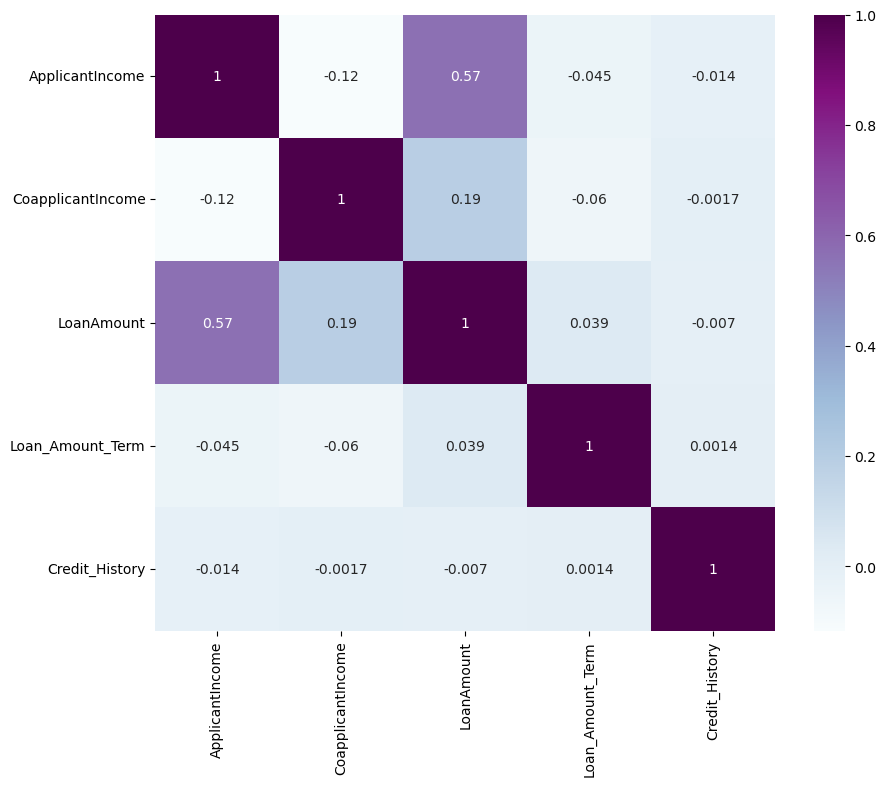

In [15]:
## Correlation check
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
print(corr)
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot= True,cmap='BuPu')

# Feature Enginerring

In [16]:
## Feature Enginerring
###  Total Applicant Income
df['Total_Applicant_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

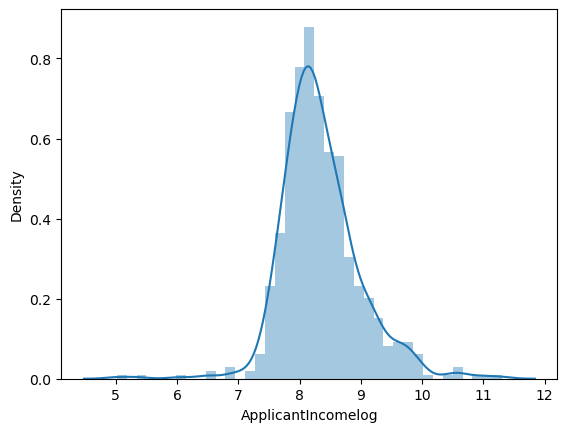

In [17]:
## Apply Log Trnasformation for ApplicantIncome

df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'] + 1)
sns.distplot(df['ApplicantIncomelog'])


<Axes: xlabel='LoanAmountlog', ylabel='Density'>

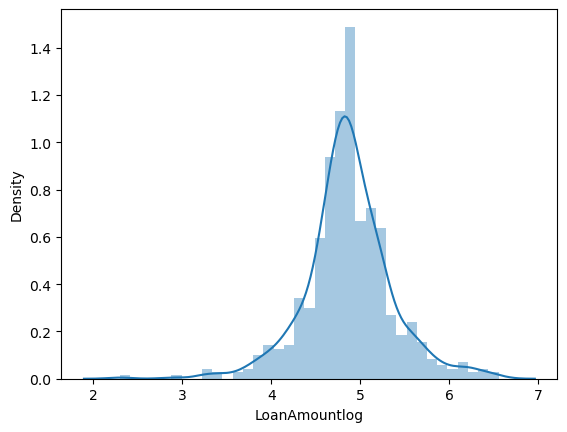

In [18]:
## Apply Log Trnasformation for LoanAmount

df['LoanAmountlog'] = np.log(df['LoanAmount'] + 1)
sns.distplot(df['LoanAmountlog'])


<Axes: xlabel='LoanAmount_Term_log', ylabel='Density'>

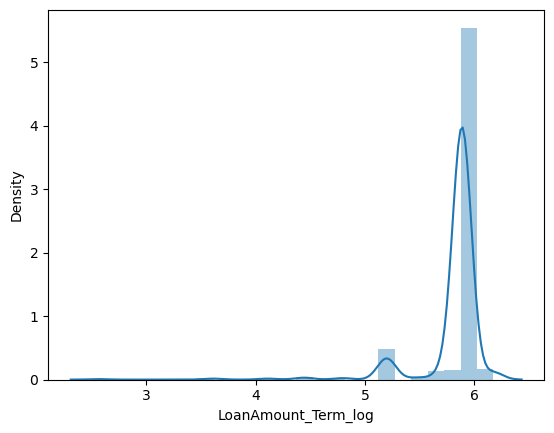

In [19]:
## Apply Log Trnasformation for Loan_Amount_Term

df['LoanAmount_Term_log'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['LoanAmount_Term_log'])


<Axes: xlabel='Total_Applicant_Income_Log', ylabel='Density'>

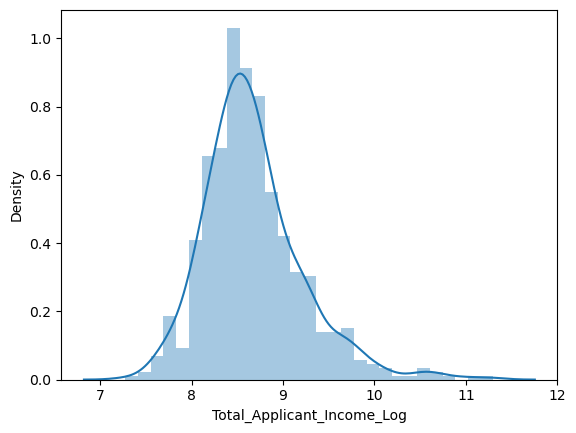

In [20]:
## Apply Log Trnasformation for Total_Applicant_Income

df['Total_Applicant_Income_Log'] = np.log(df['Total_Applicant_Income'] + 1)
sns.distplot(df['Total_Applicant_Income_Log'])


In [21]:
## DataFrame after applying log function
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,ApplicantIncomelog,LoanAmountlog,LoanAmount_Term_log,Total_Applicant_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [22]:
## Drop Unnecessary Features
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Applicant_Income','Loan_ID']
df = df.drop(columns = cols, axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,LoanAmount_Term_log,Total_Applicant_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [23]:
## Converting all categorical to numerical do encoding technique
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,LoanAmount_Term_log,Total_Applicant_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [25]:
df.dtypes

Gender                          int32
Married                         int32
Dependents                      int32
Education                       int32
Self_Employed                   int32
Credit_History                float64
Property_Area                   int32
Loan_Status                     int32
ApplicantIncomelog            float64
LoanAmountlog                 float64
LoanAmount_Term_log           float64
Total_Applicant_Income_Log    float64
dtype: object

In [26]:
## Splitting Independent and Dependent features

X = df.drop(columns = ['Loan_Status'], axis = 1) 
Y = df['Loan_Status']

# Implementing Models

In [27]:
## Modelling Part
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [28]:
## Splitting Train and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25,random_state= 42)

In [30]:
## First Model 1 : Logistic Regression

model1 = LogisticRegression()
model1.fit(X_train,Y_train)
y_pred_model1 = model1.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred_model1)
print("Accuracy Score of Logistic Regression: " ,accuracy * 100) 


Accuracy Score of Logistic Regression:  77.27272727272727


In [31]:
score = cross_val_score(model1,X,Y,cv = 5)
score
print ("Cross Validation Score for Logistic Regression: " , np.mean(score)*100)

Cross Validation Score for Logistic Regression:  80.9462881514061


In [32]:
## Second Model 2 : Decision Tree

model2 = DecisionTreeClassifier()
model2.fit(X_train,Y_train)
y_pred_model2 = model2.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred_model2)
print("Accuracy Score of Decison Tree : " ,accuracy * 100) 


Accuracy Score of Decison Tree :  70.12987012987013


In [33]:
score = cross_val_score(model2,X,Y,cv = 5)
score
print ("Cross Validation Score for Decision Tree " , np.mean(score)*100)

Cross Validation Score for Decision Tree  70.52245768359323


In [34]:
## Third Model 3 : Random Classifier

model3 = RandomForestClassifier()
model3.fit(X_train,Y_train)
y_pred_model3 = model3.predict(X_test)
accuracy = accuracy_score(y_pred_model3,Y_test)
print("Accuracy Score of Random Forest: " ,accuracy * 100) 


Accuracy Score of Random Forest:  76.62337662337663


In [35]:
## Fourth Model 4 : KNeighbor Model

model4 = KNeighborsClassifier(n_neighbors = 3)
model4.fit(X_train,Y_train)
y_pred_model4 = model4.predict(X_test)
accuracy = accuracy_score(y_pred_model4,Y_test)
print("Accuracy Score of KNeighbor Model: " ,accuracy * 100) 


Accuracy Score of KNeighbor Model:  71.42857142857143


In [36]:
score = cross_val_score(model4,X,Y,cv = 5)
score
print ("Cross Validation Score for KNeighbor " , np.mean(score)*100)

Cross Validation Score for KNeighbor  73.61721977875517


In [37]:
## Checking the reports of all models
from sklearn.metrics import classification_report

def generate_classification_report(model_name, Y_test, y_pred):
    report = classification_report(Y_test, y_pred)
    print(f"Classification Report for {model_name}:\n{report}\n")

generate_classification_report(model1, Y_test, y_pred_model1)
generate_classification_report(model2, Y_test, y_pred_model2)
generate_classification_report(model3, Y_test, y_pred_model3)
generate_classification_report(model4, Y_test, y_pred_model4)


Classification Report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


Classification Report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.59      0.48      0.53        54
           1       0.75      0.82      0.78       100

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154


Classification Report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.82      0.43      0.56        54
           1       0.75      0.95      0.84       100

    accuracy                

In [38]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [39]:
## Doing Oversampling for Imbalanced Data

from imblearn.over_sampling import RandomOverSampler

In [40]:
oversample = RandomOverSampler(random_state = 42)
X_resampled,Y_resampled = oversample.fit_resample(X,Y)

df_resampled = pd.concat([pd.DataFrame(X_resampled , columns = X.columns),pd.Series(Y_resampled,name= "Loan_status")],axis=1)

In [41]:
X_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,LoanAmount_Term_log,Total_Applicant_Income_Log
0,1,0,0,0,0,1.000000,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.000000,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,4.859812,5.198497,8.292298
840,1,1,1,0,0,0.842199,0,7.539559,4.127134,5.888878,7.539559
841,1,1,1,0,0,0.000000,0,7.933080,4.990433,5.888878,8.456381
842,1,1,2,1,0,0.000000,2,7.969012,3.828641,5.198497,7.969012


In [42]:
Y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

In [43]:
df_resampled['Loan_status'].value_counts()

Loan_status
1    422
0    422
Name: count, dtype: int64

In [44]:
## Splitting Train and Test Data
X_resampled_train, X_resampled_test, Y_resampled_train, Y_resampled_test = train_test_split(X_resampled,Y_resampled,test_size = 0.25,random_state= 42)

In [45]:
## First Model 1 : Logistic Regression with Balanced Dataset

model1_b = LogisticRegression()
model1_b.fit(X_resampled_train,Y_resampled_train)
y_pred_model1_b = model1_b.predict(X_resampled_test)
accuracy = accuracy_score(Y_resampled_test,y_pred_model1_b)
print("Accuracy Score of Logistic Regression: " ,accuracy * 100) 


Accuracy Score of Logistic Regression:  69.19431279620854


In [46]:
## Second Model 2 : Decision Tree with Balanced Dataset

model2_b = DecisionTreeClassifier()
model2_b.fit(X_resampled_train,Y_resampled_train)
y_pred_model2_b = model2_b.predict(X_resampled_test)
accuracy = accuracy_score(Y_resampled_test,y_pred_model2_b)
print("Accuracy Score of Decison Tree : " ,accuracy * 100) 


Accuracy Score of Decison Tree :  81.04265402843602


In [47]:
## Third Model 3 : Random Classifier with Balanced Dataset

model3_b = RandomForestClassifier()
model3_b.fit(X_resampled_train,Y_resampled_train)
y_pred_model3_b = model3_b.predict(X_resampled_test)
accuracy = accuracy_score(y_pred_model3_b,Y_resampled_test)
print("Accuracy Score of Random Forest: " ,accuracy * 100) 


Accuracy Score of Random Forest:  88.62559241706161


In [48]:
## Fourth Model 4 : KNeighbor Model with Balanced Dataset

model4_b = KNeighborsClassifier(n_neighbors = 3)
model4_b.fit(X_resampled_train,Y_resampled_train)
y_pred_model4_b = model4_b.predict(X_resampled_test)
accuracy = accuracy_score(y_pred_model4_b,Y_resampled_test)
print("Accuracy Score of KNeighbor Model: " ,accuracy * 100) 


Accuracy Score of KNeighbor Model:  72.51184834123224


In [49]:
## Checking the reports of all models with balanced dataset
from sklearn.metrics import classification_report

def generate_classification_report(model_name, Y_test, y_pred):
    report = classification_report(Y_test, y_pred)
    print(f"Classification Report for {model_name}:\n{report}\n")

generate_classification_report(model1_b, Y_resampled_test, y_pred_model1_b)
generate_classification_report(model2_b, Y_resampled_test, y_pred_model2_b)
generate_classification_report(model3_b, Y_resampled_test, y_pred_model3_b)
generate_classification_report(model4_b, Y_resampled_test, y_pred_model4_b)


Classification Report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.84      0.54      0.65       114
           1       0.62      0.88      0.72        97

    accuracy                           0.69       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.73      0.69      0.69       211


Classification Report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       114
           1       0.82      0.75      0.78        97

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.81      0.81      0.81       211


Classification Report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       114
           1       0.85      0.92      0.88        97

    accuracy                

# Predictions using selected model which is Random forest 

In [50]:

# Prepare new data (matching the training features)
new_data = {
    'Gender': 0,  # Example values
    'Married': 0,
    'Dependents': 0,
    'Education': 0,
    'Self_Employed': 0,
    'Credit_History': 1,
    'Property_Area': 2,
    'ApplicantIncomelog': 10.82,  # Log-transformed value
    'LoanAmountlog': 11.51,       # Log-transformed value
    'LoanAmount_Term_log': 5.39, # Log-transformed value
    'Total_Applicant_Income_Log': 11.93,  # Log-transformed value
}

# Create a DataFrame with the same structure as X_resampled
new_df = pd.DataFrame([new_data])

# Step 3: Make predictions
prediction = model3_b.predict(new_df)
if prediction[0] == 1:
    print("The person is eligible for a loan.")
else:
    print("The person is not eligible for a loan.")

# Step 4: (Optional) Get probabilities
probabilities = model3_b.predict_proba(new_df)
print(f"Probability of not eligible (Class 0): {probabilities[0][0]:.2f}")
print(f"Probability of eligible (Class 1): {probabilities[0][1]:.2f}")


The person is eligible for a loan.
Probability of not eligible (Class 0): 0.23
Probability of eligible (Class 1): 0.77
